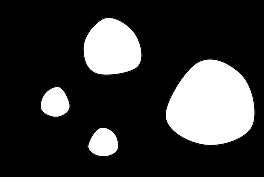

In [28]:
from scipy.ndimage.filters import gaussian_filter
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
import io, urllib
% matplotlib inline

f = io.BytesIO(urllib.request.urlopen("https://goo.gl/W9MQDT").read())
org = Image.open(f).convert('L')
# org.show()
org.resize((np.asarray(org.size)//2))

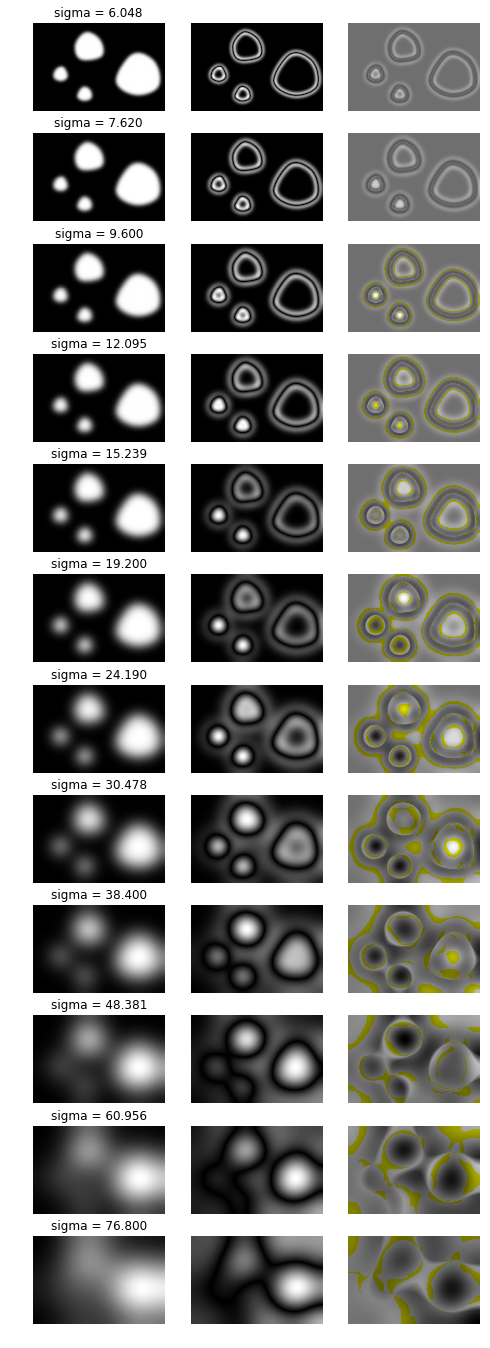

In [29]:
# sigma = 1.6                    #first scale
# k= 2**(1/3.)
sigma_i = 1.6*3                   #first scale
k= 2**(1/3.)
pic = []
dog =[]
ddog = []
img = org
sigma = sigma_i

# スケールスペースの作成
for i in range(14):
    sigma = sigma * k
    img = np.array(img, np.float64)
    pic.append(gaussian_filter(img, sigma) )

# DoG の計算
for i in range(13):
    dog.append(np.abs(pic[i+1]-pic[i]))

# DoG の増減の真理値
for i in range(12):
    ddog.append(dog[i+1]-dog[i])
    
dog -= np.min(dog)
dog *= 255 / (np.max(dog) - np.min(dog))

ddog -= np.min(ddog)
ddog *= 255 / (np.max(ddog)  - np.min(ddog))

plt.figure(figsize=(8,24))
for i in range(12):
    plt.subplot(12,3,3*i+1)
    plt.axis('off')
    plt.imshow((pic[i]).astype(np.uint8),'gray')
    plt.title( "sigma = {:5.3f}".format(sigma_i*k**(i+1)) )
    plt.subplot(12,3,3*i+2)
    plt.axis('off')
    plt.imshow((dog[i]).astype(np.uint8),'gray')
    plt.subplot(12,3,3*i+3)
    plt.axis('off')
    sdog = np.zeros((org.size[1],org.size[0],3))
    sdog[:,:,0] ,sdog[:,:,1], sdog[:,:,2] = ddog[i],ddog[i],ddog[i]
    if i >1:
            cond =  np.logical_and((ddog[i] < ddog[i-1]),([ddog[i-1] > ddog[i-2]]))[0]
            sdog[:,:,2][cond] = 0
    plt.imshow((sdog).astype(np.uint8))

左端：　ガウスぼかし画像

中央：　DoG画像（絶対値）　　　

右端：　DoGの差分　黄色はDoGが＋からーに反転した領域

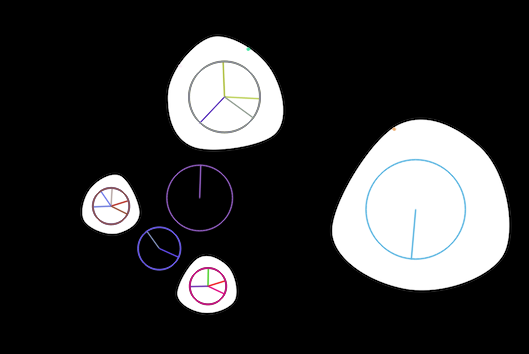

In [30]:
# SIFT 特徴抽出
import cv2,PIL.Image
gray = np.array(org)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,None)
img=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
PIL.Image.fromarray(img[:,:,::-1])

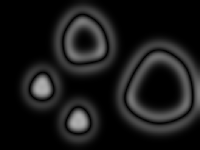

In [25]:
Image.fromarray(dog[3].astype(np.uint8)).resize([200, 150])

In [14]:
np.array(org.size)//4

array([132,  88])

In [34]:
des = sift.compute(gray,kp)

In [55]:
kp[0]

<KeyPoint 0x119ee7840>